## BME680  
The Boshe BME680 is a gas sensor able to measure relative humidity, barometric pressure, ambient, temperature and volatile organic compound (VOC) gases.  

Manufacturer link: https://www.bosch-sensortec.com/products/environmental-sensors/gas-sensors-bme680/  
Breakout boards used:  
https://www.adafruit.com/product/3660  
https://www.sparkfun.com/products/14570

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from meerkat import bme680, parser, tools

Initialize sensor and get the onboard calibration values.

In [3]:
dev = bme680.BME680(bus_n=1)

In [4]:
dev.read_calibration()

Measurement steps, based on the datasheet section 3.2.1 Quickstart:
1. Set humidty oversample
2. Set temperature oversample
3. Set pressure oversample

In [5]:
dev.set_oversampling(h=1, t=2, p=16)

4. Set gas wait time with gas_wait_0 to 0x59 = 100ms

In [6]:
ms = 25
multiplier = 16
wait = dev.calc_wait_time(t=ms, x=multiplier)
print("Wait: {} ms".format(ms*multiplier))
print("code:", hex(wait))

Wait: 400 ms
code: 0x99


In [7]:
dev.set_gas_wait(n=0, value=wait)

5. Heater set-point with res_heat_0 to 200 C

In [8]:
resistance = dev.calc_res_heat(target_temp=200)
resistance

177

In [9]:
dev.set_res_heat(n=0, value=resistance)

6. Set nb_conv to the 0 profile used in steps 4 and 5

In [10]:
dev.nb_conv = 0

7. Set run_gas to 1 to enable gas measurements

In [11]:
dev.gas_on()

8. Set mode to 0b01 to trigger a single forced mode measurement

In [12]:
%%time
dev.forced_mode()
dev.measure()
t = dev.temperature()
p = dev.pressure()
h = dev.humidity()
g = dev.gas()
print("T: ", t)
print("P: ", p)
print("RH:", h)
print("Gas Resistance:", g)
print("Gas Valid:", dev._gas_valid)
print("Heat Stable:", dev._heat_stab)

T:  18.942109375
P:  1005.9915896635366
RH: 48.12575415022118
Gas Resistance: 13724
Gas Valid: 1
Heat Stable: 1
CPU times: user 6.6 ms, sys: 6.92 ms, total: 13.5 ms
Wall time: 447 ms


#### Measurement  

In [13]:
dev.get(description="test_1")

['test_1',
 1,
 21.3391796875,
 1005.9418565469299,
 48.52717183814422,
 15065,
 1,
 1]

In [14]:
dev.get(description="test_2", n=5)

[['test_2', 1, 22.458125, 1006.0377383597275, 48.633660196902426, 15892, 1, 1],
 ['test_2',
  2,
  23.00734375,
  1005.9375886393594,
  48.586346196373356,
  16429,
  1,
  1],
 ['test_2',
  3,
  23.432734375,
  1005.9456337907548,
  48.44527113609114,
  16816,
  1,
  1],
 ['test_2',
  4,
  23.7008984375,
  1005.9379143450616,
  48.18213900810529,
  17075,
  1,
  1],
 ['test_2',
  5,
  23.8958203125,
  1005.9780083030529,
  47.89820130981115,
  17403,
  1,
  1]]

#### JSON Data Publishing  

In [15]:
# lower metadata interval from a default of once every 10 samples
dev.json_writer.metadata_interval = 3

In [16]:
dev.publish(description='test_3', n=7, delay=1)

['{"description": "test_3", "sample_n": 1, "T": 23.885859375, "P": 1006.08573284642, "RH": 47.49920263911029, "g_res": 17494, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-12-08 09:20:07.957121"}',
 '{"description": "test_3", "sample_n": 2, "T": 20.551875, "P": 1006.0318036401659, "RH": 45.94882858048142, "g_res": 17134, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-12-08 09:20:09.401494"}',
 '{"description": "test_3", "sample_n": 3, "T": 20.1419140625, "P": 1006.0340286095972, "RH": 45.31493052167149, "g_res": 17032, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-12-08 09:20:10.845819", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "BME680", "urls": "https://www.bosch-sensortec.com/products/environmental-sensors/gas-sensors-bme680/", "manufacturer": "Bosch Sensortec", "header": ["description", "sample_n", 

#### JSON Writer Output

In [17]:
# default writer format is CSV, switch to JSON
dev.writer_output = 'json'

In [18]:
# writer method with description and sample number
dev.write(description='test_3', n=30)

In [19]:
dev.json_writer.path

'2020_12_08_09_20_18_bme680.jsontxt'

In [20]:
with open(dev.json_writer.path, 'r') as f:
    for _ in range(4):
        print(f.readline().strip())

{"description": "test_3", "sample_n": 0, "T": 19.9266796875, "P": 1006.0296581530566, "RH": 44.4705687200733, "g_res": 17039, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-12-08 09:20:18.127158"}
{"description": "test_3", "sample_n": 1, "T": 22.0352734375, "P": 1005.8886536687879, "RH": 44.786325121097576, "g_res": 17433, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-12-08 09:20:18.572152"}
{"description": "test_3", "sample_n": 2, "T": 23.096015625, "P": 1005.9211602801307, "RH": 44.926531319551515, "g_res": 17657, "g_val": 1, "heat_stab": 1, "std_time_ms": "2020-12-08 09:20:19.015807", "encoding": "utf-8", "format": "text/json", "standard": "RFC 8259", "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "metadata": {"name": "BME680", "urls": "https://www.bosch-sensortec.com/products/environmental-sensors/gas-sensors-bme680/", "manufacturer": "Bosch Sensortec", "header": ["description", "sample_n", "T", "P

#### CSV Writer Output

In [21]:
# switch back to CSV format
dev.writer_output = 'csv'

In [22]:
# writer method with description and sample number
dev.write(description='test_4', n=60, delay=2)

In [23]:
dev.csv_writer.path

'2020_12_08_09_20_31_bme680.csv'

In [24]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

#### Metadata in CSV

In [25]:
m

{'case_sensitive_header': False,
 'comment': '#',
 'delimiter': ',',
 'double_quote': True,
 'encoding': 'utf-8',
 'escape_char': '\\',
 'format': 'text/csv',
 'line_terminator': '\n',
 'metadata': {'accuracy': [None,
   1,
   '+/-1.0',
   '+/-0.12',
   '+/-3',
   '+/-15%',
   None,
   None],
  'bus_addr': 119,
  'bus_n': 1,
  'description': 'Bosch Humidity, Pressure, Temperature, VOC Sensor',
  'dtype': ['str', 'int', 'float', 'float', 'float', 'float', 'bool', 'bool'],
  'header': ['description',
   'sample_n',
   'T',
   'P',
   'RH',
   'g_res',
   'g_val',
   'heat_stab'],
  'manufacturer': 'Bosch Sensortec',
  'name': 'BME680',
  'precision': [None, 1, 0.1, 0.18, 0.008, 0.08, None, None],
  'units': [None,
   'count',
   'Celcius',
   'hectopascals',
   'percent',
   'ohms',
   None,
   None],
  'urls': 'https://www.bosch-sensortec.com/products/environmental-sensors/gas-sensors-bme680/'},
 'null_sequence': 'NA',
 'path': '2020_12_08_09_20_31_bme680.csv',
 'quote_char': '"',
 'ski

#### Parsed CSV data

In [26]:
df.head()

,std_time_ms,description,sample_n,T,P,RH,g_res,g_val,heat_stab,datetime64_ns
0,2020-12-08 09:20:31.537967,test_4,0,24.718672,1006.106202,39.470011,18263,1,1,2020-12-08 09:20:31.537967
1,2020-12-08 09:20:33.983758,test_4,1,20.427852,1005.976698,38.666471,17533,1,1,2020-12-08 09:20:33.983758
2,2020-12-08 09:20:36.429614,test_4,2,20.015352,1005.990117,39.364620,17305,1,1,2020-12-08 09:20:36.429614
3,2020-12-08 09:20:38.875459,test_4,3,19.845625,1005.991429,40.285024,17104,1,1,2020-12-08 09:20:38.875459
4,2020-12-08 09:20:41.321346,test_4,4,19.762227,1005.980578,41.150262,16995,1,1,2020-12-08 09:20:41.321346


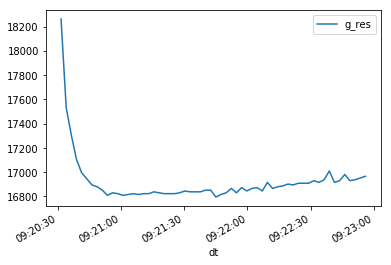

In [27]:
df["dt"] = pd.to_datetime(df.std_time_ms)
df[["dt", "g_res"]].plot(x="dt");

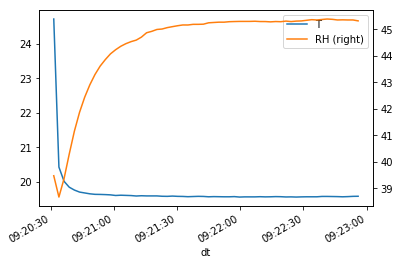

In [28]:
df[["dt", "T", "RH"]].plot(x="dt", secondary_y="RH");

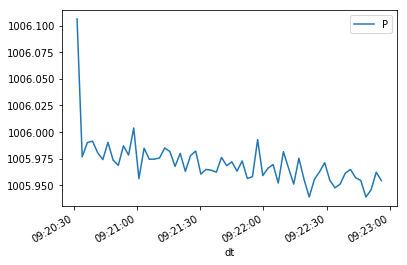

In [29]:
df[["dt", "P"]].plot(x="dt");